### Import necessary libraries

In [1]:
# Read data
import numpy as np                           # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                          # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                        # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")             # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")                    # Set Graphs Background style using seaborn

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

### EDA(Exploratory Data Analysis)

In [2]:
# Understand the data
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier                           # Decision tree Regression
import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report      # this creates a confusion matrix
from sklearn.model_selection import GridSearchCV                         # this will do cross validation

In [3]:
# Loading the train, test & sample dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# make copy of train & test
train_original = train.copy()
test_original = test.copy()

In [5]:
# checking dimension (num of rows and columns) of datasets
display(train.shape)
display(test.shape)

(50882, 14)

(21805, 13)

In [6]:
# import first rows
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [7]:
# import first rows
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [8]:
# check dataframe structure like columns and its counts, datatypes & Null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [9]:
# check dataframe structure like columns and its counts, datatypes & Null Values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [10]:
# Gives number of data points in each variable
train.count()

ID                         50882
City_Code                  50882
Region_Code                50882
Accomodation_Type          50882
Reco_Insurance_Type        50882
Upper_Age                  50882
Lower_Age                  50882
Is_Spouse                  50882
Health Indicator           39191
Holding_Policy_Duration    30631
Holding_Policy_Type        30631
Reco_Policy_Cat            50882
Reco_Policy_Premium        50882
Response                   50882
dtype: int64

In [11]:
# descriptive statistics
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


 **City_Code**

In [12]:
train["City_Code"].nunique()

36

In [13]:
test["City_Code"].nunique()

36

<AxesSubplot:>

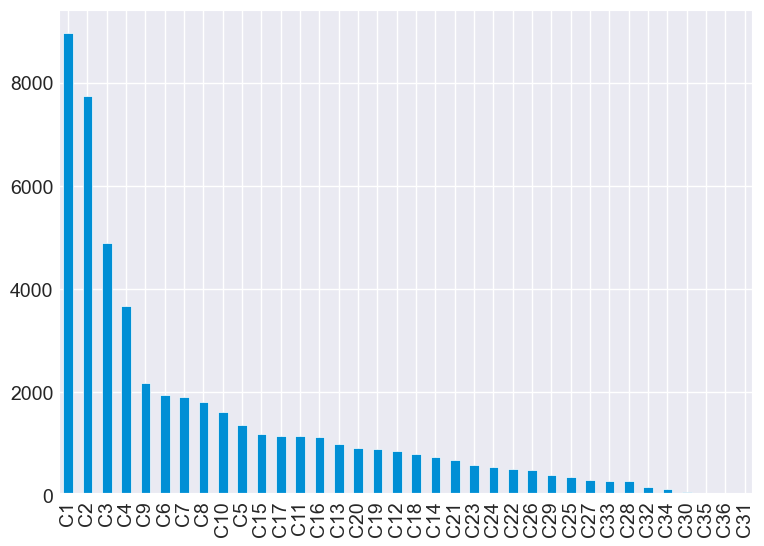

In [14]:
plt.figure(figsize=(8,6))
train["City_Code"].value_counts().plot.bar()

**Accomodation_Type**

In [15]:
train["Accomodation_Type"].nunique()

2

In [16]:
test["Accomodation_Type"].nunique()

2

In [17]:
train["Accomodation_Type"].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

**Reco_Insurance_Type**

In [18]:
train["Reco_Insurance_Type"].nunique()

2

In [19]:
test["Reco_Insurance_Type"].nunique()

2

In [20]:
train["Reco_Insurance_Type"].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

**Is_Spouse**

In [21]:
train["Is_Spouse"].nunique()

2

In [22]:
test["Is_Spouse"].nunique()

2

In [23]:
train["Is_Spouse"].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

**Health Indicator**

In [24]:
train["Health Indicator"].nunique()

9

In [25]:
test["Health Indicator"].nunique()

9

In [26]:
train["Health Indicator"].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

**Holding_Policy_Duration**

In [27]:
train["Holding_Policy_Duration"].nunique()

15

In [28]:
train["Holding_Policy_Duration"].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [29]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].replace('14+', 14)
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].replace('14+', 14)

In [30]:
train["Holding_Policy_Duration"].value_counts()

1.0     4499
14      4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

**Holding_Policy_Type**

In [31]:
train["Holding_Policy_Type"].nunique()

4

In [32]:
test["Holding_Policy_Type"].nunique()

4

In [33]:
train["Holding_Policy_Type"].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

**Response**

In [34]:
train["Response"].nunique()

2

In [35]:
train["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

**Clean the data**

In [36]:
#Drop unwanted features
train.drop(['ID', 'City_Code', 'Region_Code'], axis=1, inplace=True)

test.drop(['ID', 'City_Code', 'Region_Code'], axis=1, inplace=True)

In [37]:
#Missing Values
train.isnull().sum()

Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [38]:
test.isnull().sum()

Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

<AxesSubplot:>

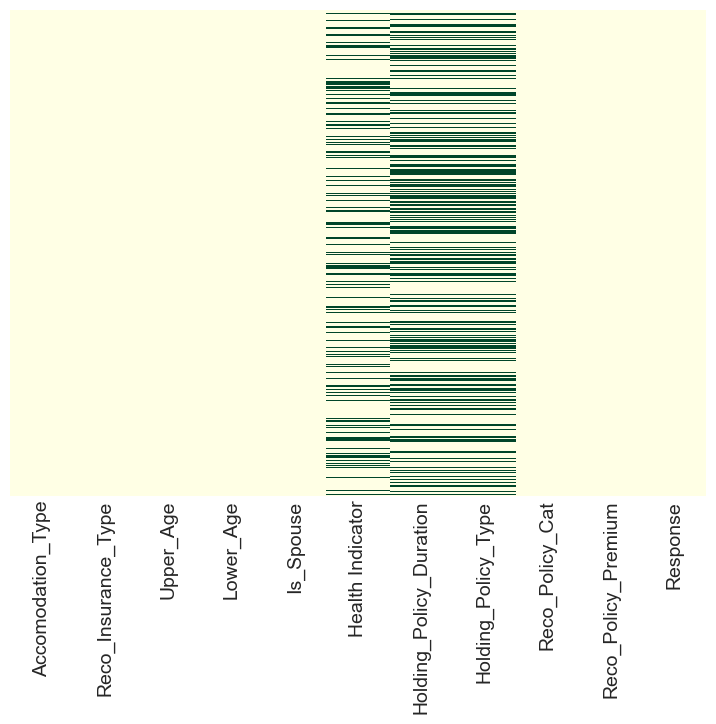

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGn')

<AxesSubplot:>

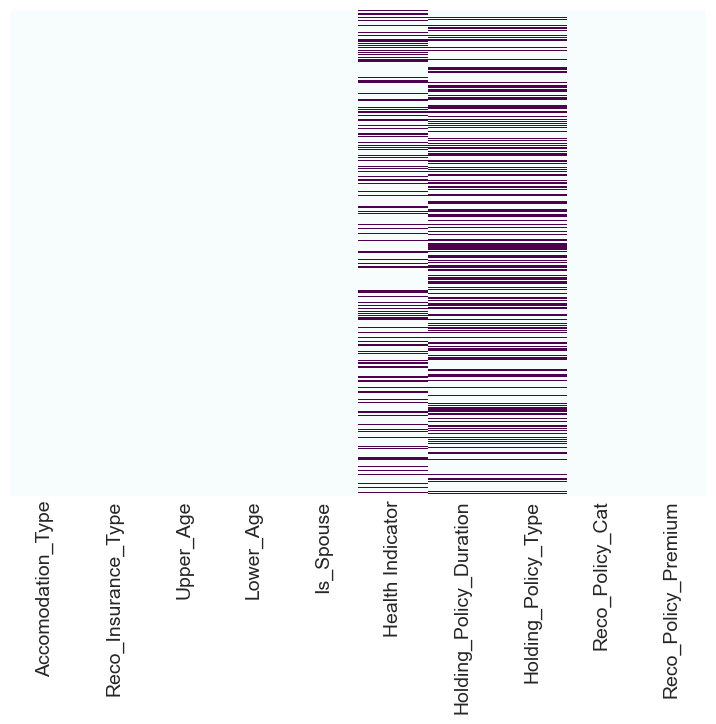

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='BuPu')

In [41]:
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].astype('float64')
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].astype('float64')

In [42]:
train["Health Indicator"] = train["Health Indicator"].fillna(train["Health Indicator"].mode()[0])
train["Holding_Policy_Duration"] = train["Holding_Policy_Duration"].fillna(train["Holding_Policy_Duration"].median())
train["Holding_Policy_Type"] = train["Holding_Policy_Type"].fillna(train["Holding_Policy_Type"].median())

test["Health Indicator"] = test["Health Indicator"].fillna(test["Health Indicator"].mode()[0])
test["Holding_Policy_Duration"] = test["Holding_Policy_Duration"].fillna(test["Holding_Policy_Duration"].median())
test["Holding_Policy_Type"] = test["Holding_Policy_Type"].fillna(test["Holding_Policy_Type"].median())

In [43]:
display(train.head(3))
display(test.head(3))

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,5.0,3.0,22,30510.0,0
2,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1


,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0


**Find Outliers**

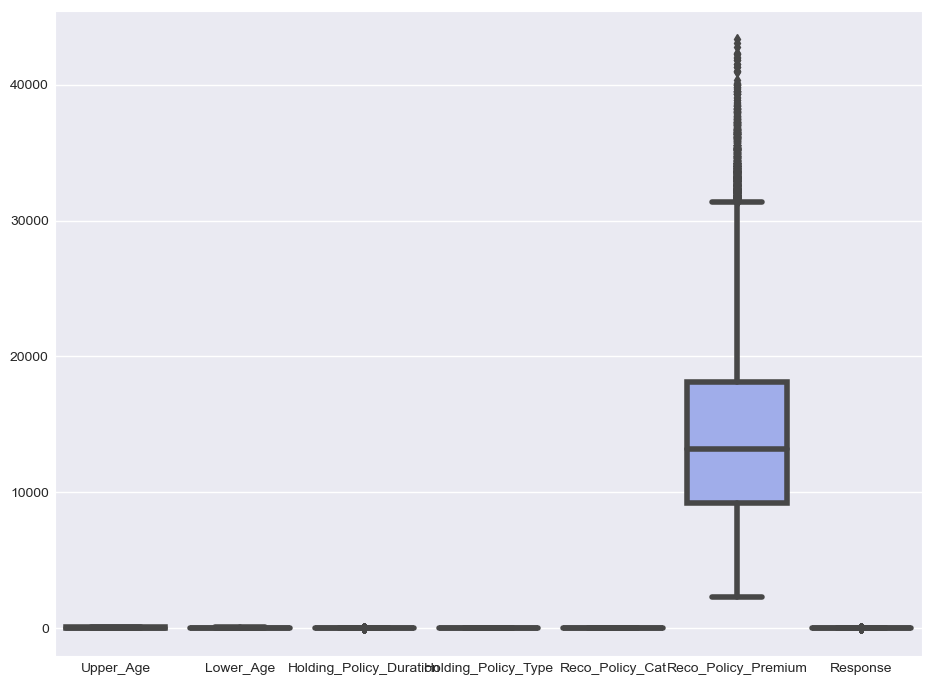

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(data=train)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

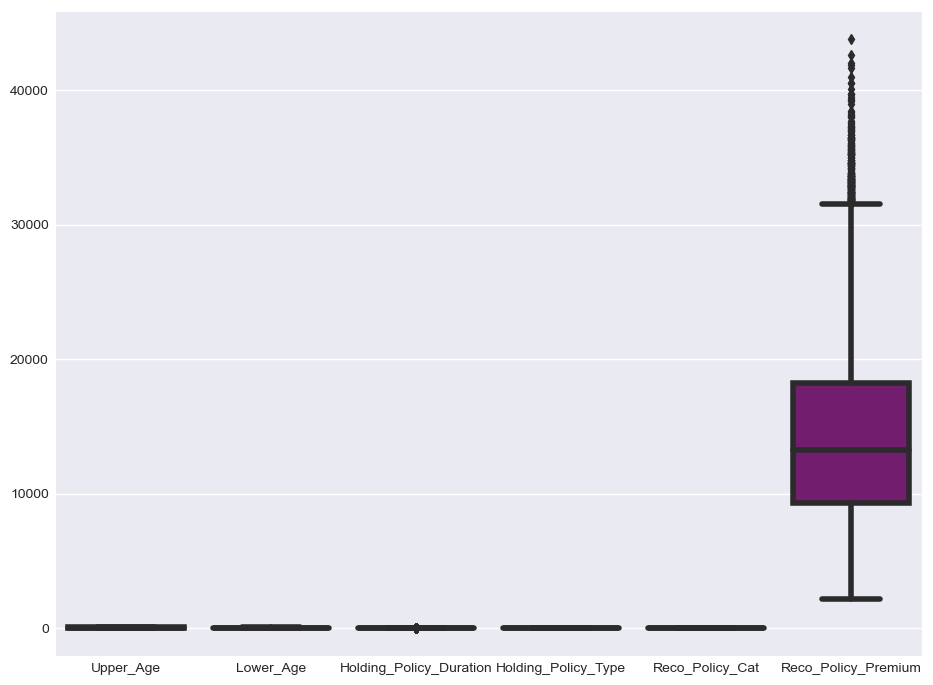

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(data=test)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Skew and Kurtosis**

In [46]:
display(train.skew())
display(test.skew())

Upper_Age                  0.217370
Lower_Age                  0.330594
Holding_Policy_Duration    1.195933
Holding_Policy_Type       -0.912864
Reco_Policy_Cat           -0.928224
Reco_Policy_Premium        0.782463
Response                   1.217936
dtype: float64

Upper_Age                  0.207386
Lower_Age                  0.326725
Holding_Policy_Duration    1.193157
Holding_Policy_Type       -0.878830
Reco_Policy_Cat           -0.926143
Reco_Policy_Premium        0.744149
dtype: float64

Text(0.5, 1.0, 'Skew:0.7824628894616024')

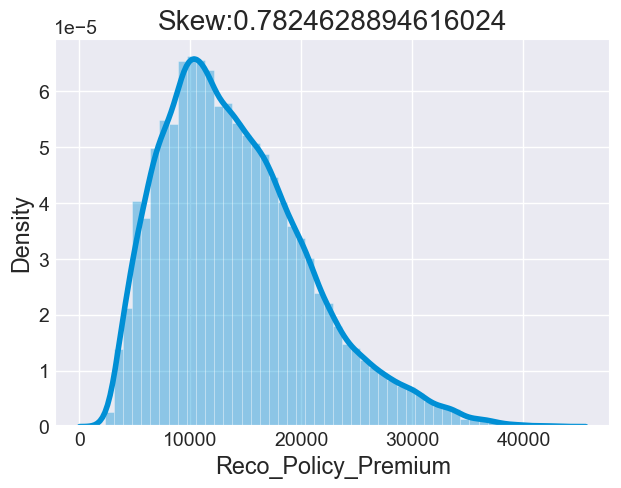

In [47]:
sns.distplot(train['Reco_Policy_Premium'])
Skew_Reco_Policy_Premium = train['Reco_Policy_Premium'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Premium))

Text(0.5, 1.0, 'Skew:0.7441494510155582')

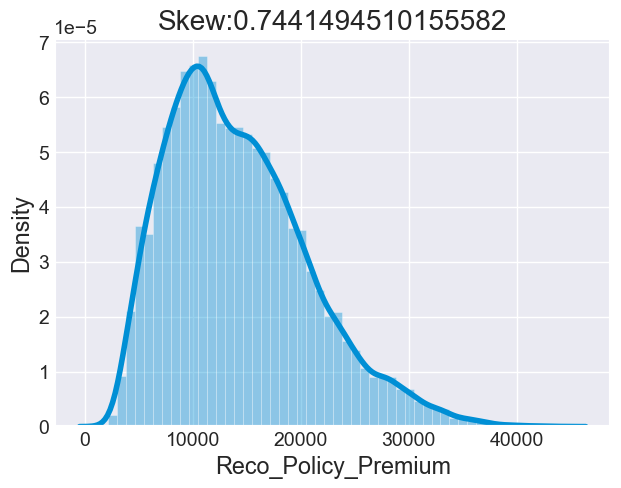

In [48]:
sns.distplot(test['Reco_Policy_Premium'])
Skew_Reco_Policy_Premium = test['Reco_Policy_Premium'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Premium))

Text(0.5, 1.0, 'Skew:1.1959327028746392')

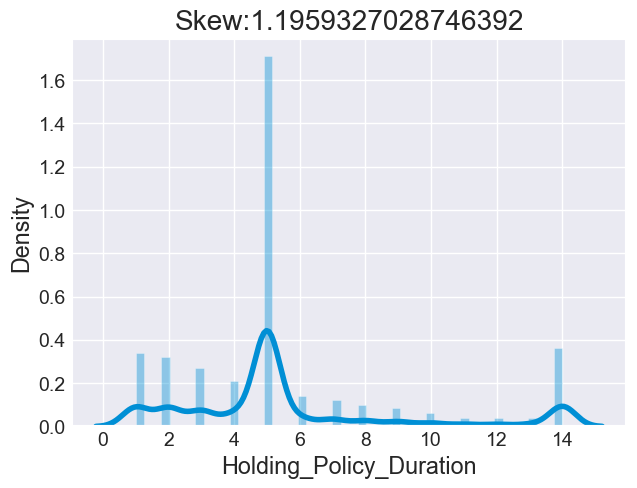

In [49]:
sns.distplot(train['Holding_Policy_Duration'])
Skew_Holding_Policy_Duration = train['Holding_Policy_Duration'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Duration))

Text(0.5, 1.0, 'Skew:1.1931572352051443')

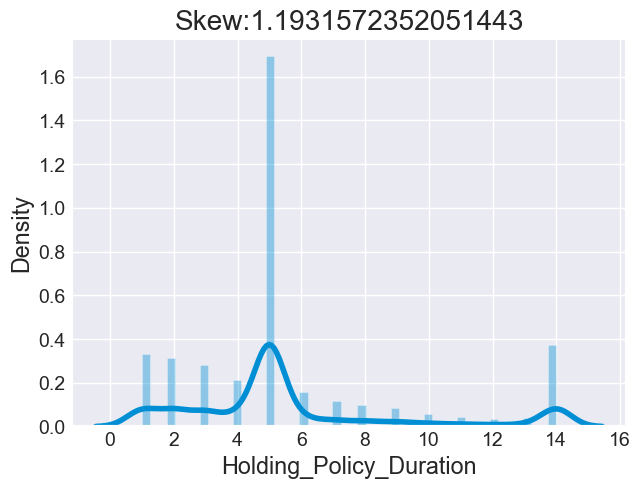

In [50]:
sns.distplot(test['Holding_Policy_Duration'])
Skew_Holding_Policy_Duration = test['Holding_Policy_Duration'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Duration))

Text(0.5, 1.0, 'Skew:-0.9128644756126452')

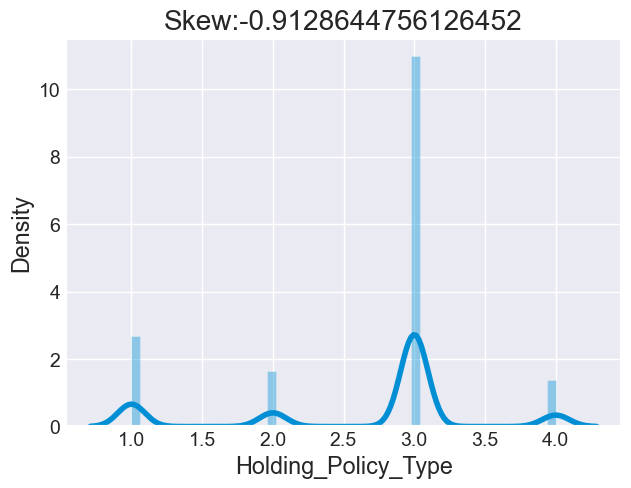

In [51]:
sns.distplot(train['Holding_Policy_Type'])
Skew_Holding_Policy_Type = train['Holding_Policy_Type'].skew()
plt.title("Skew:"+str(Skew_Holding_Policy_Type))

Text(0.5, 1.0, 'Skew:-0.9282235542995848')

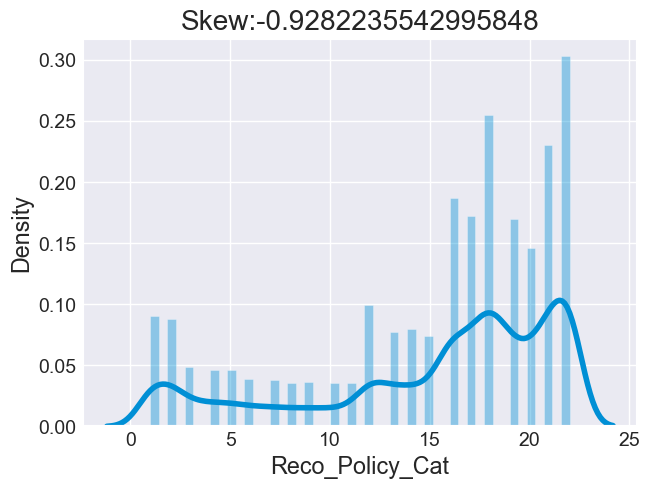

In [52]:
sns.distplot(train['Reco_Policy_Cat'])
Skew_Reco_Policy_Cat = train['Reco_Policy_Cat'].skew()
plt.title("Skew:"+str(Skew_Reco_Policy_Cat))

**Analysis of Relationship between variables**

In [53]:
train.corr()['Reco_Policy_Cat']

Upper_Age                  0.025257
Lower_Age                  0.021163
Holding_Policy_Duration    0.035566
Holding_Policy_Type        0.053760
Reco_Policy_Cat            1.000000
Reco_Policy_Premium        0.060989
Response                   0.114321
Name: Reco_Policy_Cat, dtype: float64

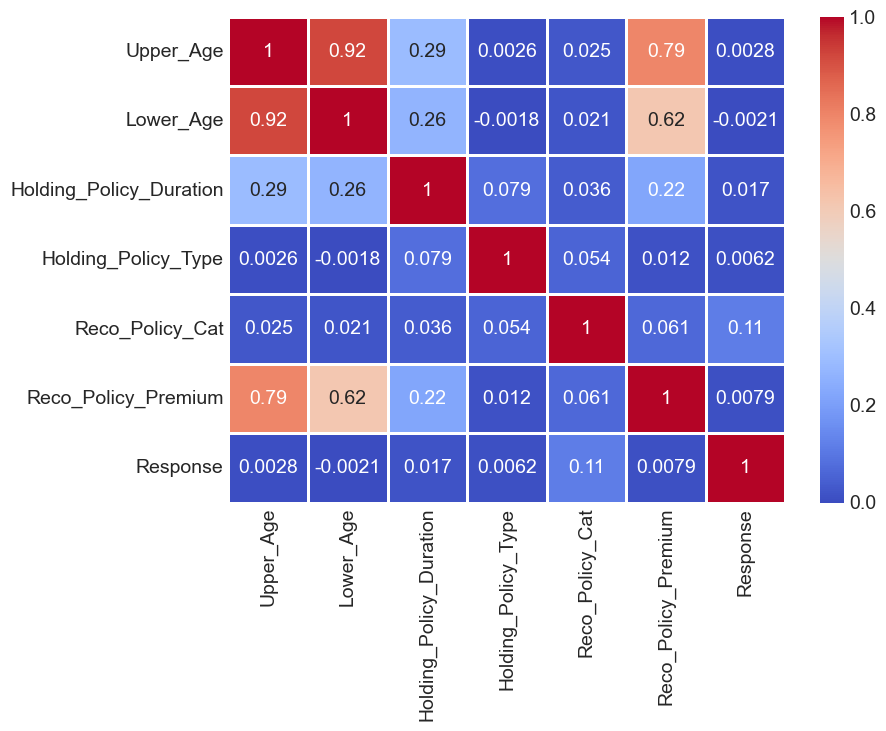

In [54]:
plt.figure(figsize=(8,6)) 
sns.heatmap(train.corr(), annot=True, linecolor = 'white', linewidths = 1, cmap="coolwarm")
plt.show()

### Data Visualisation

**Univariate Analysis**

In [55]:
numeric_cols_train = train.select_dtypes(include=[np.number])
display(numeric_cols_train.head())

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,36,36,14.0,3.0,22,11628.0,0
1,75,22,5.0,3.0,22,30510.0,0
2,32,32,1.0,1.0,19,7450.0,1
3,52,48,14.0,3.0,19,17780.0,0
4,44,44,3.0,1.0,16,10404.0,0


In [56]:
numeric_cols_test = test.select_dtypes(include=[np.number])
display(numeric_cols_test.head())

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,30,30,6.0,3.0,5,11934.0
1,69,68,3.0,3.0,18,32204.8
2,28,28,2.0,4.0,17,9240.0
3,23,23,3.0,3.0,18,9086.0
4,75,75,5.0,3.0,5,22534.0


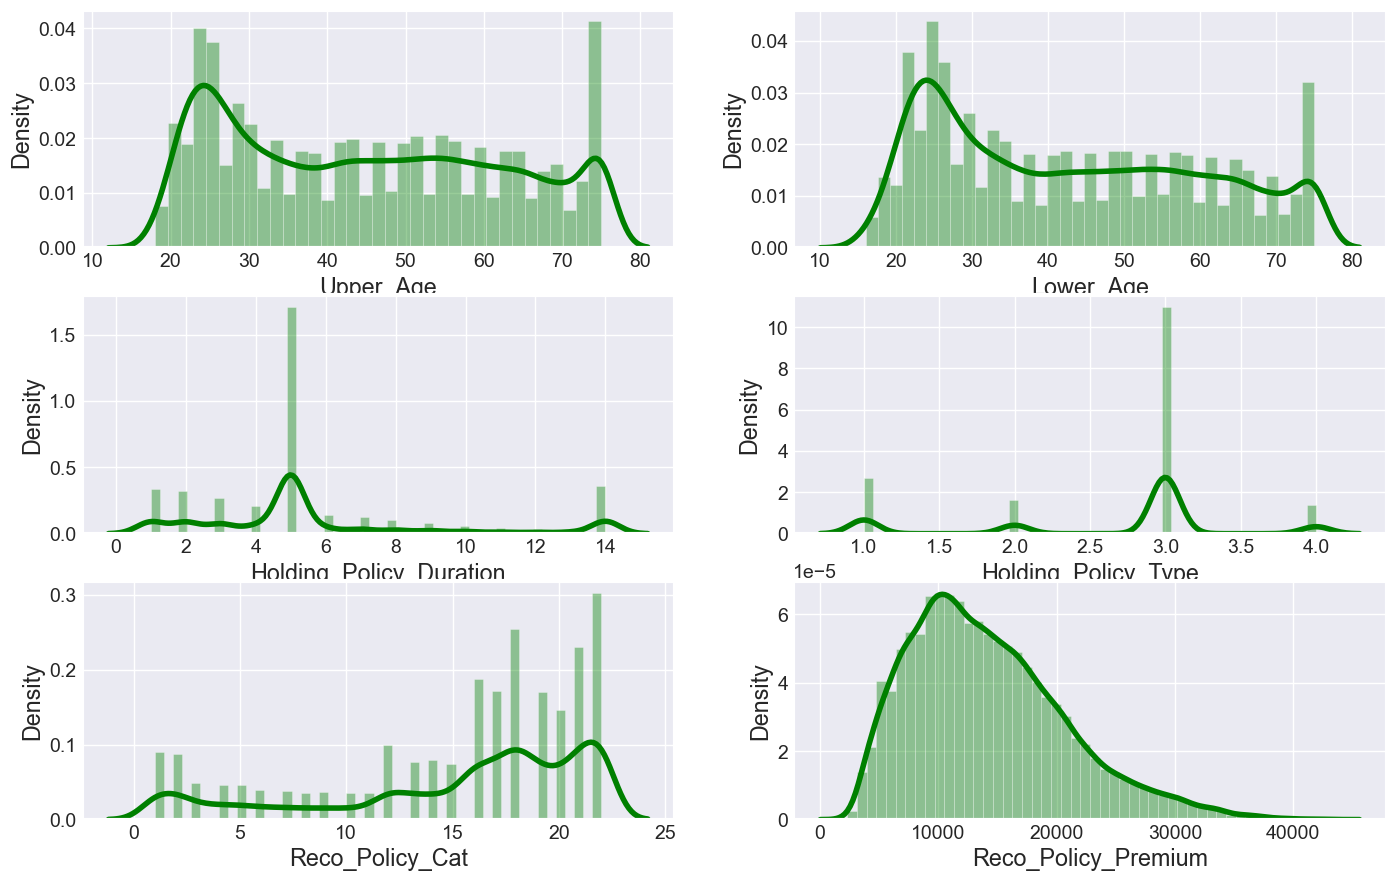

In [57]:
plt.figure(figsize = (15,10))
feature = numeric_cols_train.columns[0:6]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(numeric_cols_train[i[1]], color='g')

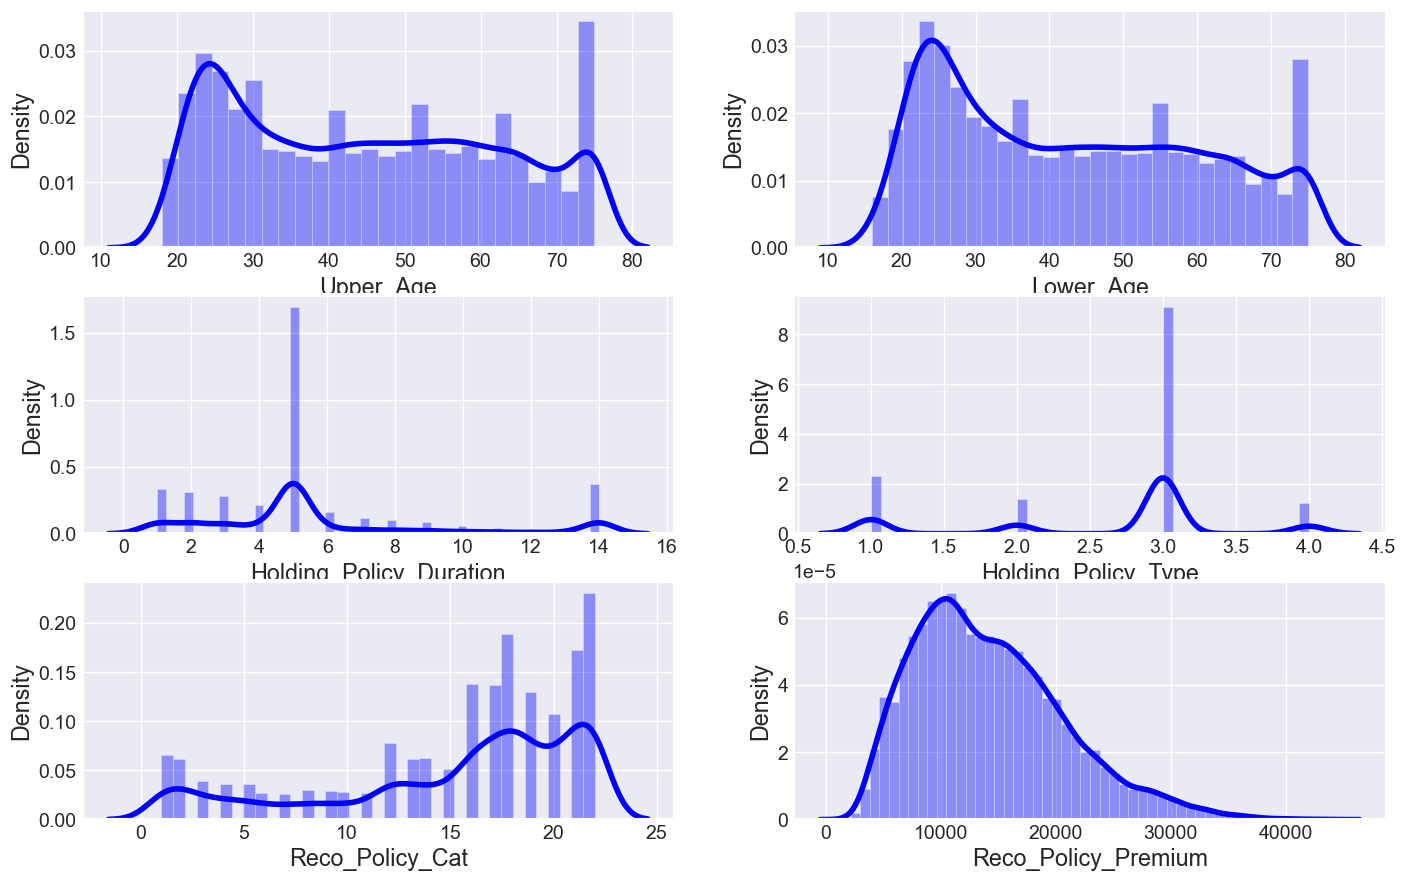

In [58]:
plt.figure(figsize = (15,10))
feature = numeric_cols_test.columns[0:6]
for i in enumerate(feature):
    plt.subplot(3,2, i[0]+1)
    sns.distplot(numeric_cols_test[i[1]], color='b')

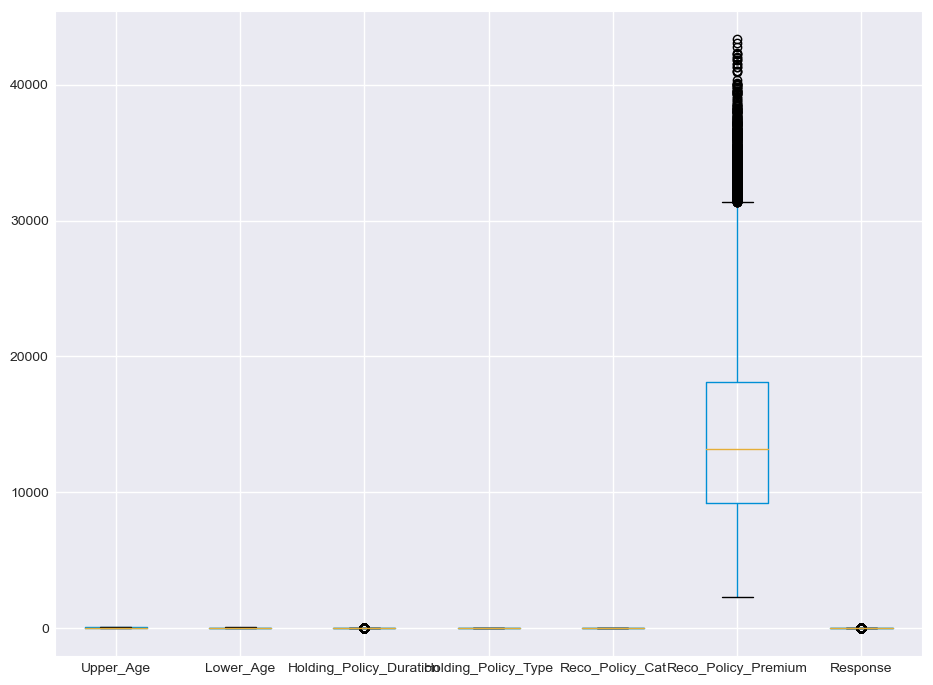

In [59]:
plt.figure(figsize = (10, 8)) 
train.boxplot(fontsize=10)
plt.show()

**Bivariate Analysis**

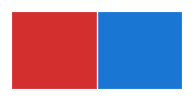

In [60]:
# Setting color palette
colors = ['#D32F2F','#1976D2']
sns.palplot(sns.color_palette(colors))

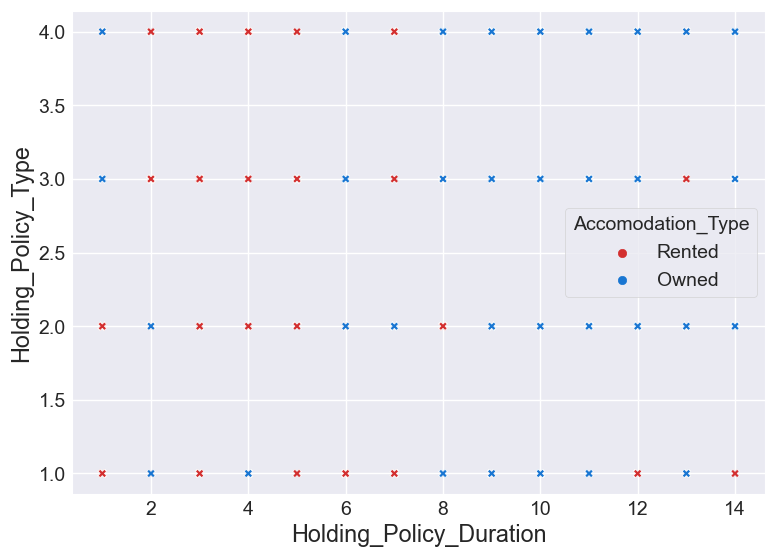

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Holding_Policy_Duration", y="Holding_Policy_Type", hue="Accomodation_Type", data=train, palette=colors, marker="X")
plt.show()

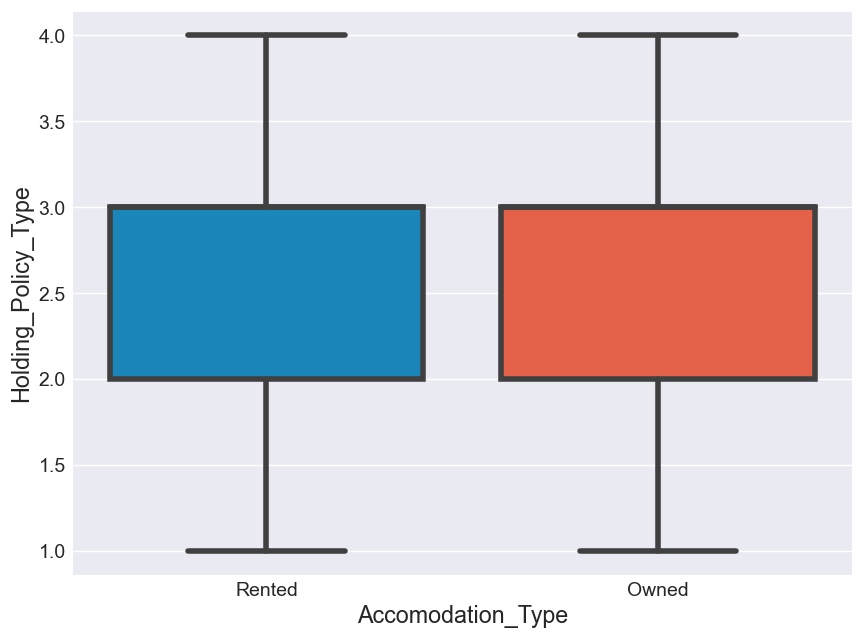

In [92]:
plt.figure(figsize=(9,7))
sns.boxplot(data=train, x='Accomodation_Type', y='Holding_Policy_Type')
plt.show()

**Multivariate Analysis**

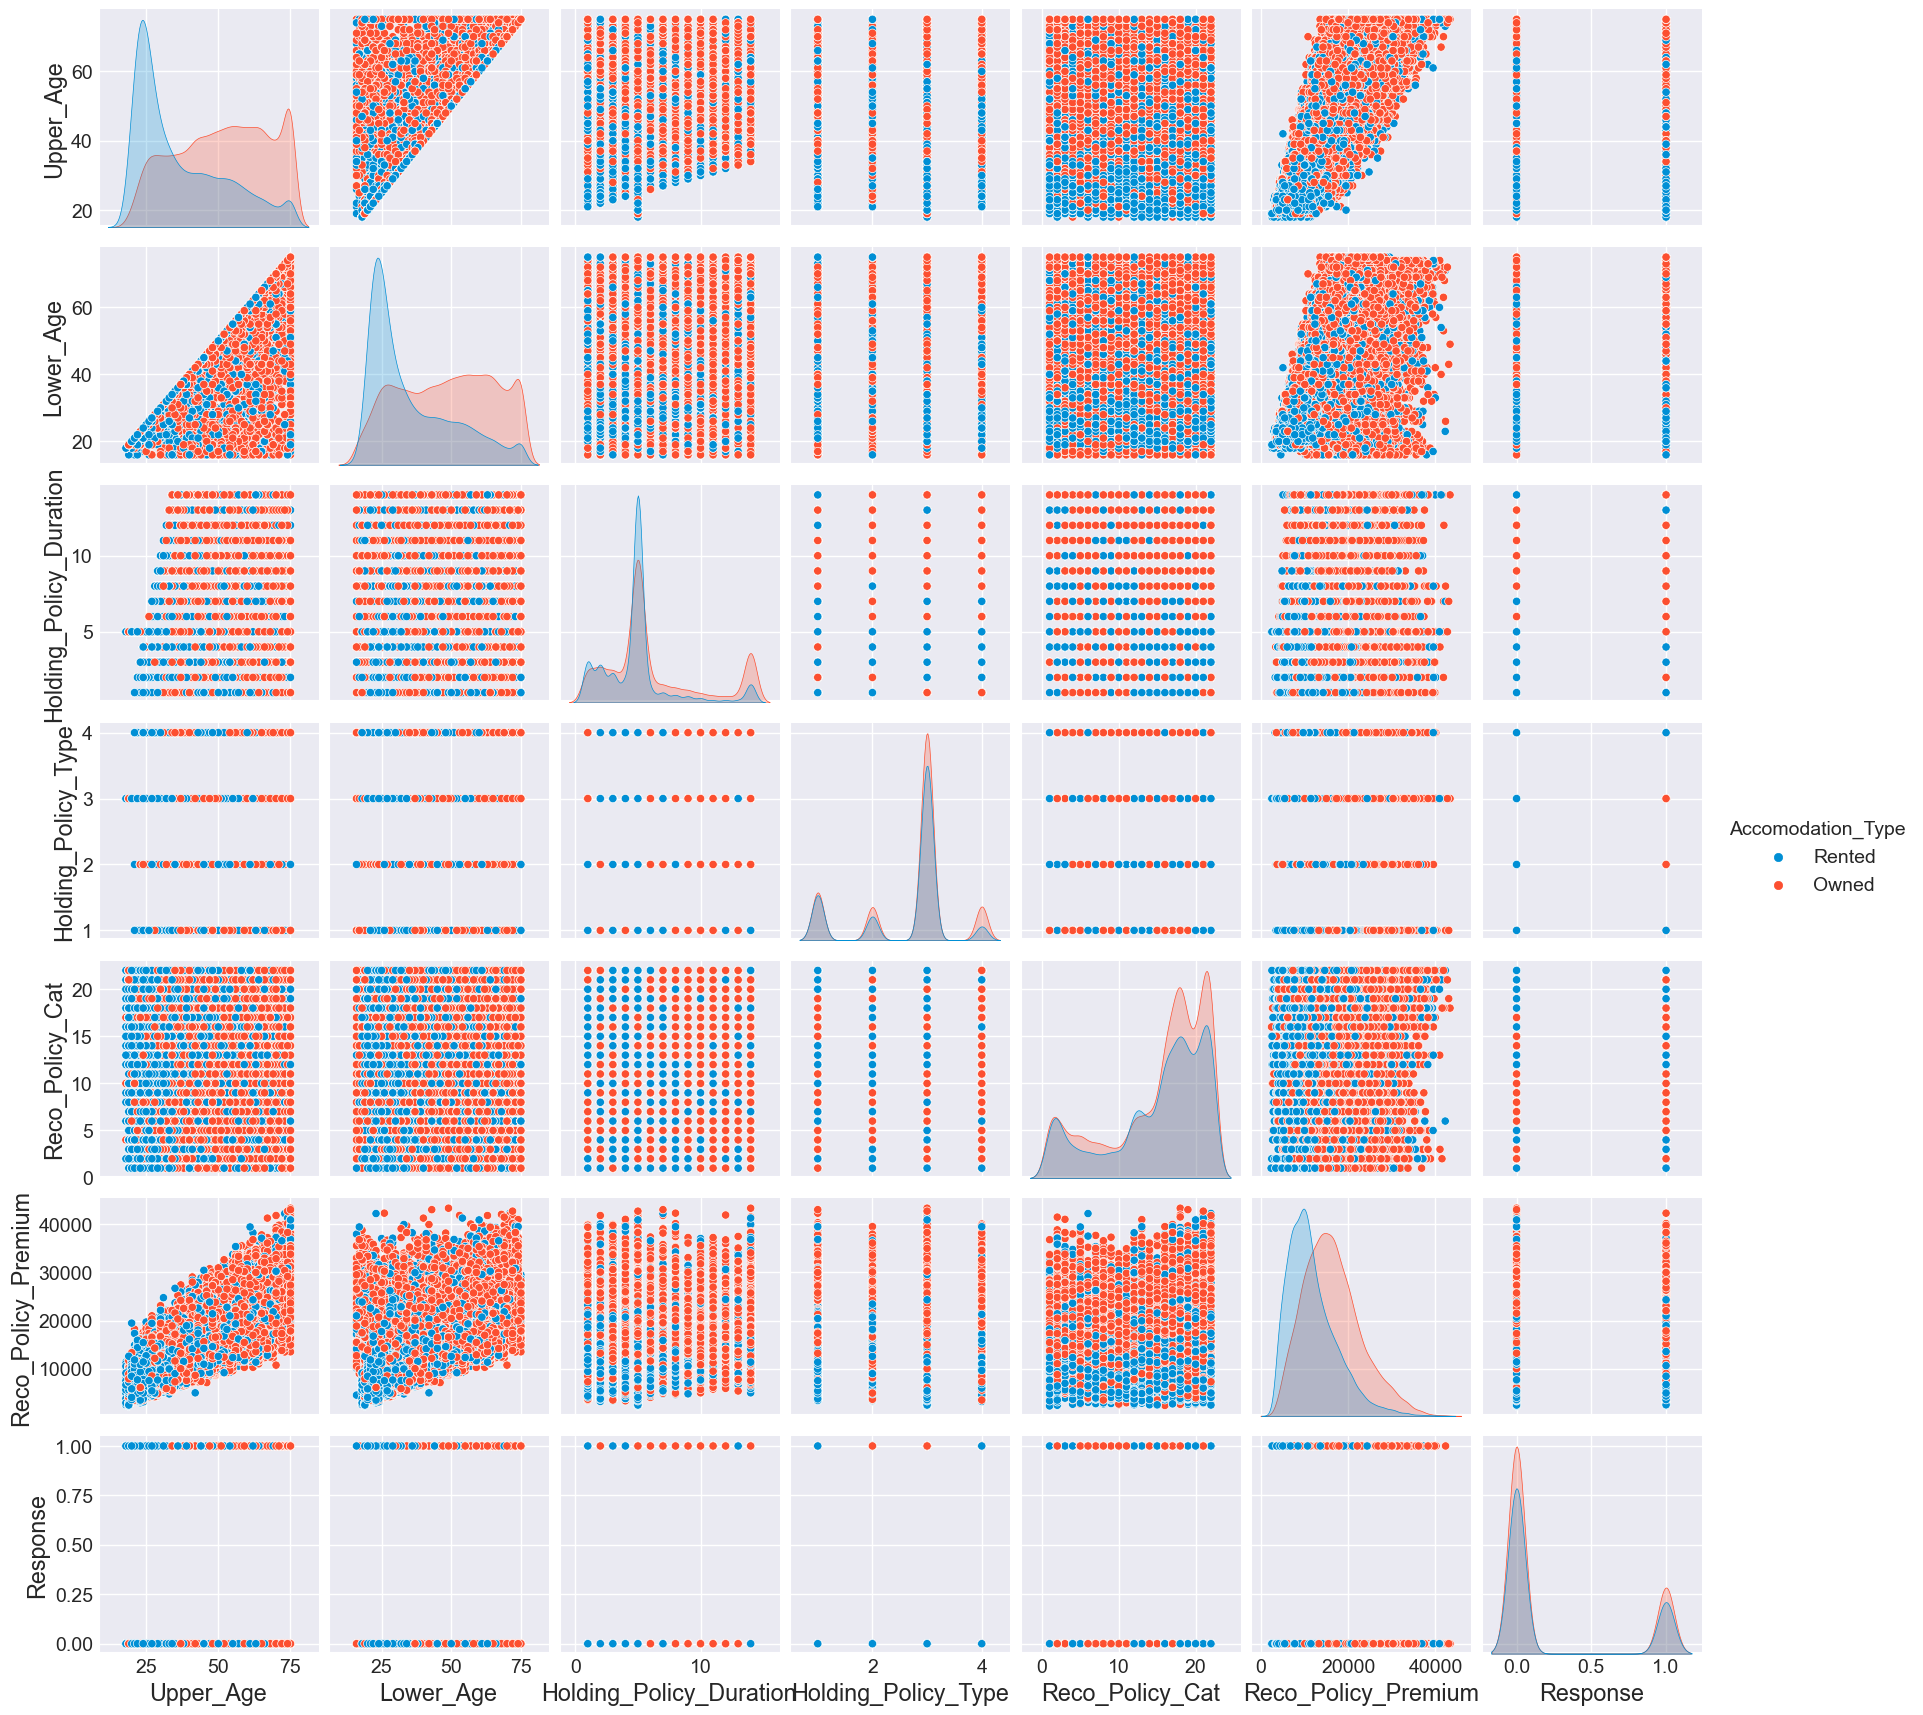

In [63]:
# Pairplot
sns.pairplot(train, hue='Accomodation_Type')
plt.show()

###  Model building and Evaluation

In [64]:
# Transform discrete values to columns with 1 and 0s
train_OHE = pd.get_dummies(train)

# Do the same for competition data
test_OHE = pd.get_dummies(test)

In [65]:
display(train_OHE.head())
display(test_OHE.head())

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,...,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,36,36,14.0,3.0,22,11628.0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1,75,22,5.0,3.0,22,30510.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,32,32,1.0,1.0,19,7450.0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,52,48,14.0,3.0,19,17780.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,44,44,3.0,1.0,16,10404.0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Accomodation_Type_Owned,Accomodation_Type_Rented,Reco_Insurance_Type_Individual,Reco_Insurance_Type_Joint,...,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,30,30,6.0,3.0,5,11934.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,69,68,3.0,3.0,18,32204.8,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
2,28,28,2.0,4.0,17,9240.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,23,23,3.0,3.0,18,9086.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,75,75,5.0,3.0,5,22534.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
print("Training Data Shape (Rows,Columns):",train_OHE.shape)
print("Competition Data Shape (Rows,Columns):", test_OHE.shape)

Training Data Shape (Rows,Columns): (50882, 22)
Competition Data Shape (Rows,Columns): (21805, 21)


In [67]:
# Independant variable
X = train_OHE.drop('Response',axis=1)        # All rows & columns exclude Target features

# Dependant variable
y = train_OHE['Response']                   # Only target feature

In [68]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [69]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40705, 21) (10177, 21) (40705,) (10177,)


**Logistic Regression**

In [70]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred_LogReg = LogReg.predict(X_test)

In [72]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LogReg.score(X_train, y_train), LogReg.score(X_test, y_test)))

Train Score 0.76 & Test Score 0.77


**Random Forest Classifier**

In [73]:
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=1)

In [74]:
y_pred_rf = rf.predict(X_test)

In [75]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

Train Score 0.76 & Test Score 0.77


**XGBoost**

In [76]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
y_pred_xgb = xgb.predict(X_test)

In [78]:
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train, y_train), xgb.score(X_test, y_test)))

Train Score 0.78 & Test Score 0.76


**CATBOOST**

In [79]:
CB = CatBoostClassifier(verbose=0, n_estimators=100)
CB.fit(X_train, y_train)

In [80]:
y_pred_xgb = CB.predict(X_test)

In [81]:
print("Train Score {:.2f} & Test Score {:.2f}".format(CB.score(X_train, y_train), CB.score(X_test, y_test)))

Train Score 0.77 & Test Score 0.76


**LGBM**

In [82]:
lgbm_model = LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

In [83]:
y_pred_LGBM = lgbm_model.predict(X_test)

In [84]:
print("Train Score {:.2f} & Test Score {:.2f}".format(lgbm_model.score(X_train,y_train),lgbm_model.score(X_test,y_test)))

Train Score 0.76 & Test Score 0.77


In [85]:
y_pred_test = xgb.predict(test_OHE)

**Submission**

In [86]:
submission = pd.DataFrame({'ID': test_original['ID'], 'Response': y_pred_test})
submission.to_csv('Insurance.csv', index=False)